The purpose of this notebook is to explore the drfit skill score senstivity to windage value for the sj100 and CIOPSE models.

**with fixed HRDPS winds**

Two drifter types were considere:

## SABS_disc
* Drift simulations with windage from 0.0, 0.1, 0.2, ...., 4.0 were performed.
* Nominal value from DAR calculations: 2.679430797883035


## SABS_long
* Drift simulations with windage from 0.0, 0.1, 0.2, ...., 2.0 were performed.
* Nominal value from DAR calculations:1.6374491849666404

In [1]:
import os


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_dir='/home/soontiensn/data/gpsc-work7/OPP/DriftEval-portmodels/saint-john/wind-sensitivity/'

In [3]:
def load_data(model, score, hour,drifter_type):
    if drifter_type == 'SABS_disc':
        subdir='w0.0-w0.1-w0.2-w0.3-w0.4-w0.5-w0.6-w0.7-w0.8-w0.9-w1.0-w1.1-w1.2-w1.3-w1.4-w1.5-w1.6-w1.7-w1.8-w1.9-w2.0-w2.1-w2.2-w2.3-w2.4-w2.5-w2.6-w2.7-w2.8-w2.9-w3.0-w3.1-w3.2-w3.3-w3.4-w3.5-w3.6-w3.7-w3.8-w3.9-w4.0'
    elif drifter_type == 'SABS_long':
        subdir='w0.0-w0.1-w0.2-w0.3-w0.4-w0.5-w0.6-w0.7-w0.8-w0.9-w1.0-w1.1-w1.2-w1.3-w1.4-w1.5-w1.6-w1.7-w1.8-w1.9-w2.0'
    fname = os.path.join(data_dir, drifter_type, 'all_windage', model, 'plots', subdir, 'summary_stats_tables', 
                         f'Average_{score}_at_{hour}h.csv')
    df = pd.read_csv(fname,index_col=0)
    return df

In [4]:
df = load_data('sj100', 'Liu', '24', 'SABS_disc')

In [5]:
def scatter_score(ax, model, score, hour, drifter_type):
    df = load_data(model, score, hour, drifter_type)
    
    #build windages
    windages=[]
    for w in df.columns:
        windage = float(w.split('w')[-1])
        windages.append(windage)
        
    # gather scores
    scores = df.iloc[0, :].values
    ind_max = np.argmax(scores)
    maximum = np.max(scores)
    if score =='Separation_Distance':
        ind_max = np.argmin(scores)
        maximum = np.min(scores)
    # plot 
    ax.plot(windages, scores,'-o',label=model)
    return windages[ind_max], maximum

# SABS_disc

Nominal = 2.679430797883035

Liu
6 hour
sj100 optimal windage: 1.4
CIOPSE optimal windage: 2.1
fundy500 optimal windage: 1.4
12 hour
sj100 optimal windage: 1.2
CIOPSE optimal windage: 1.9
fundy500 optimal windage: 1.4
18 hour
sj100 optimal windage: 1.1
CIOPSE optimal windage: 1.8
fundy500 optimal windage: 1.4
24 hour
sj100 optimal windage: 0.0
CIOPSE optimal windage: 1.5
fundy500 optimal windage: 1.4


Molcard
6 hour
sj100 optimal windage: 1.4
CIOPSE optimal windage: 2.0
fundy500 optimal windage: 1.4
12 hour
sj100 optimal windage: 1.0
CIOPSE optimal windage: 1.7
fundy500 optimal windage: 1.3
18 hour
sj100 optimal windage: 1.0
CIOPSE optimal windage: 1.8
fundy500 optimal windage: 1.2
24 hour
sj100 optimal windage: 0.0
CIOPSE optimal windage: 1.5
fundy500 optimal windage: 1.0


Separation_Distance
6 hour
sj100 optimal windage: 1.3
CIOPSE optimal windage: 2.0
fundy500 optimal windage: 1.4
12 hour
sj100 optimal windage: 1.1
CIOPSE optimal windage: 1.9
fundy500 optimal windage: 1.3
18 hour
sj100 optimal windage: 1.1
CI

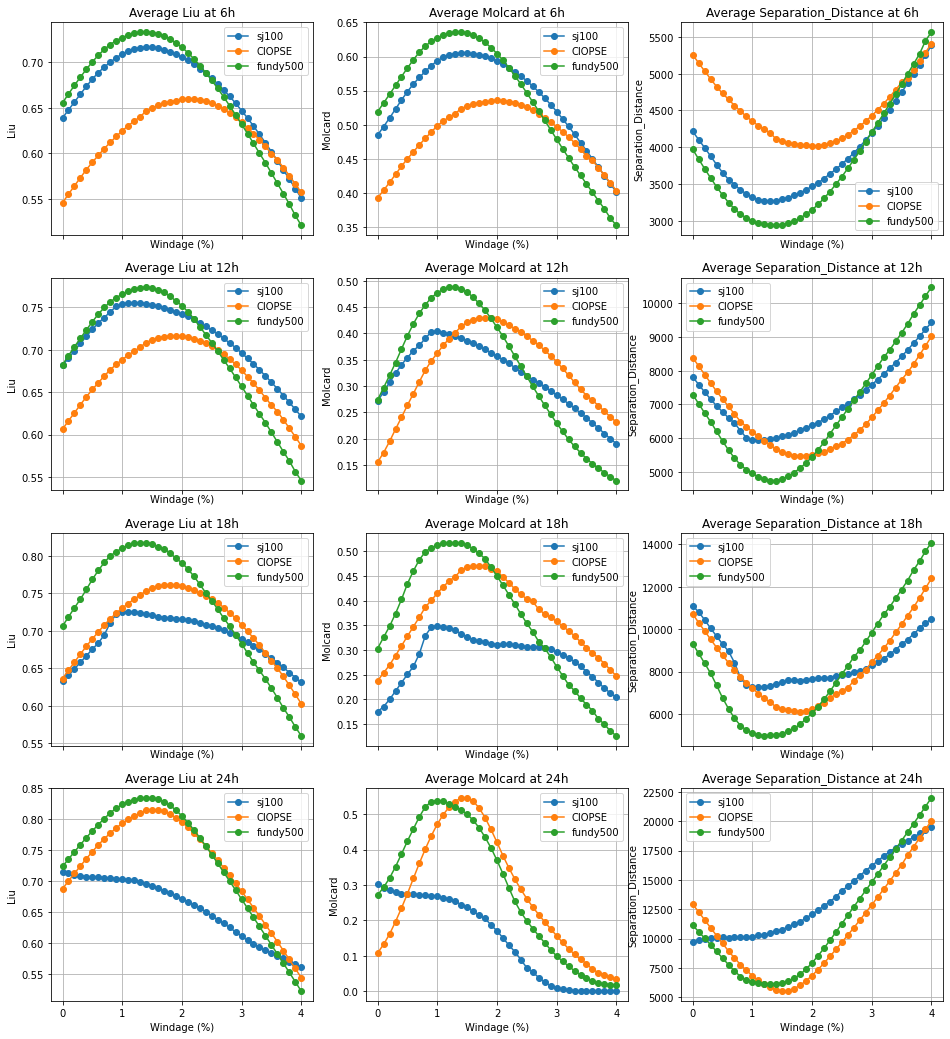

In [6]:
drifter_type='SABS_disc'
fig, axs = plt.subplots(4,3, figsize=(16,18), sharex=True)
for score, ax_rows in zip(['Liu', 'Molcard', 'Separation_Distance'], axs.T):
    print(score)
    for hour, ax in zip(['6', '12', '18', '24'], ax_rows):
        print(f'{hour} hour')
        for m in ['sj100', 'CIOPSE', 'fundy500']:
            max_windage, max_score = scatter_score(ax,m, score, hour, drifter_type)
            print(f'{m} optimal windage: {max_windage}')
        ax.set_ylabel(score)
        ax.set_xlabel('Windage (%)')
        ax.set_title(f'Average {score} at {hour}h')
        ax.legend()
        ax.grid()
    print('\n')

# SABS_long

Noimnal: 1.6374491849666404

Liu
6 hour
sj100 optimal windage: 0.6
CIOPSE optimal windage: 1.4
fundy500 optimal windage: 0.5
12 hour
sj100 optimal windage: 0.5
CIOPSE optimal windage: 1.3
fundy500 optimal windage: 0.5
18 hour
sj100 optimal windage: 0.6
CIOPSE optimal windage: 1.2
fundy500 optimal windage: 0.5
24 hour
sj100 optimal windage: 0.7
CIOPSE optimal windage: 1.3
fundy500 optimal windage: 0.7


Molcard
6 hour
sj100 optimal windage: 0.6
CIOPSE optimal windage: 1.4
fundy500 optimal windage: 0.5
12 hour
sj100 optimal windage: 0.7
CIOPSE optimal windage: 1.1
fundy500 optimal windage: 0.8
18 hour
sj100 optimal windage: 0.7
CIOPSE optimal windage: 1.2
fundy500 optimal windage: 0.7
24 hour
sj100 optimal windage: 0.7
CIOPSE optimal windage: 1.1
fundy500 optimal windage: 0.9


Separation_Distance
6 hour
sj100 optimal windage: 0.5
CIOPSE optimal windage: 1.4
fundy500 optimal windage: 0.4
12 hour
sj100 optimal windage: 0.5
CIOPSE optimal windage: 1.2
fundy500 optimal windage: 0.5
18 hour
sj100 optimal windage: 0.7
CI

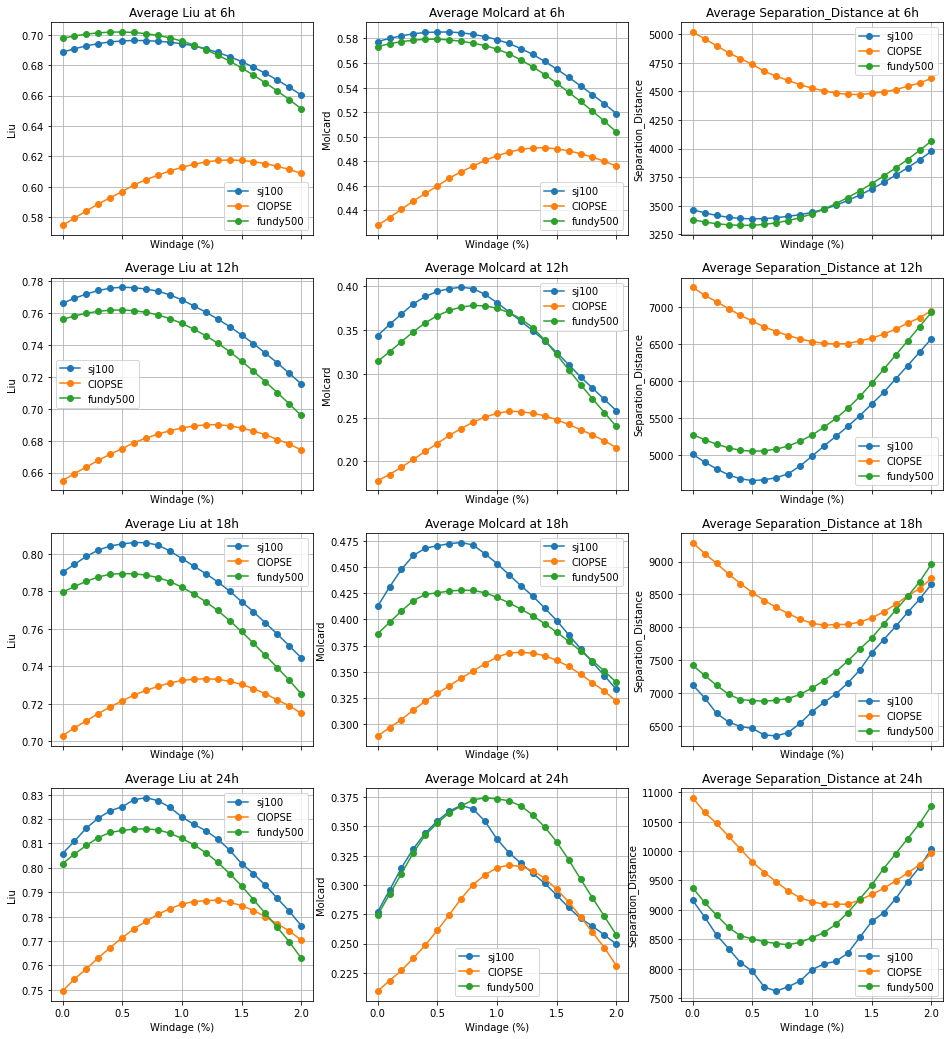

In [7]:
drifter_type='SABS_long'
fig, axs = plt.subplots(4,3, figsize=(16,18), sharex=True)
for score, ax_rows in zip(['Liu', 'Molcard', 'Separation_Distance'], axs.T):
    print(score)
    for hour, ax in zip(['6', '12', '18', '24'], ax_rows):
        print(f'{hour} hour')
        for m in ['sj100','CIOPSE',  'fundy500',]:
            max_windage, max_score = scatter_score(ax,m, score, hour, drifter_type)
            print(f'{m} optimal windage: {max_windage}')
        ax.set_ylabel(score)
        ax.set_xlabel('Windage (%)')
        ax.set_title(f'Average {score} at {hour}h')
        ax.legend()
        ax.grid()
    print('\n')

# Summary
* For sj100, lead time = 24 hour is less reliable because many runs did not extend to 24 hours. I also susepct that many drifters left the sj100 domain by 24 hours, but not CIOPSE, hence the different shapes to those curves.
* For sj100, I would only consider results for Lead Time <=18 hours, although, I should look at the domain rentention more carefully.


## SABS_disc
* For sj100, windage about 1.0-1.4% gives the best skill for most metrics and lead hours.
* fundy500 is simular, but more like 1.2-1.4%
* For CIOPSE, a windage closer 1.7-2.0% gives best results.
* For large windages (>~2.5%), CIOPSE will tend to outperform fundy500, especially for larger lead times.


## SABS_long
* For sj100, windage about 0.5-0.7% gives the best skill for most metrics and lead hours.
* Again, funyd500 is simulat with 0.4-0.9%
* For CIOPSE, a windage closer 1.1-1.4% gives best results.
* For most metrics and lead times, fundy500 outperforms CIOPSE, no matter the windage. 

# Questions
* Is it possible that a 1% estimate for stokes drift is incorrect for the Bay of Fundy? 
  * How large are the waves in the Bay of Fundy and near the Saint John harbour?
* Which drifter type would we expect to be more impacted by stokes drift?
  * Probably the SABS_discs because stokes drift decays rapidly with depth.
* Why are optimal windages for CIOPSE so different from sj100 and fundy500? 
  * Is the momentum flux from the atmosphere handled differently?
  * Is CIOPSE forced with the same winds as sj100 and fundy500?
  * Is it the tides?
  * Why would the horizontal resolution impact the optimal windage?